In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as mplt
%matplotlib inline
import numpy as np


In [4]:
#https://keras.io/api/datasets/
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

In [5]:
#train_x are images as 2D arrays of pixel values
train_x[0].shape

(28, 28)

In [6]:
#Sizes of datasets
len(train_x)

60000

In [7]:
len(test_x)

10000

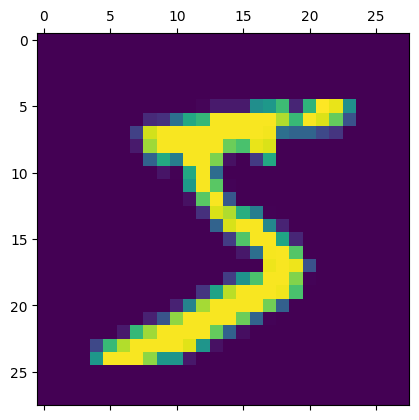

In [8]:
mplt.matshow(train_x[0])

In [9]:
train_y[0]

5

In [10]:
#scaling the dataset all pixels are between 0-255
train_x = train_x/ 255
test_x = test_x /255

In [11]:
#When create training or input data it almost always needs to be 1D
train_x_1D = train_x.reshape(len(train_x), 28*28)
test_x_1D = test_x.reshape(len(test_x), 28*28)

In [12]:
#Creating are model
NeuralNetwork = keras.Sequential([
    #dense every intail node is connect to all outputs nodes
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

NeuralNetwork.compile(
    #https://www.geeksforgeeks.org/optimizers-in-tensorflow/
                    optimizer='adaMax', 
    #https://keras.io/api/losses/
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy']
)
#training the model
NeuralNetwork.fit(train_x_1D, train_y, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6351 - accuracy: 0.8467
Epoch 2/7
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3737 - accuracy: 0.8995
Epoch 3/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3372 - accuracy: 0.9077
Epoch 4/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3195 - accuracy: 0.9115
Epoch 5/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3084 - accuracy: 0.9149
Epoch 6/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3007 - accuracy: 0.9163
Epoch 7/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2947 - accuracy: 0.9175


In [13]:
#Testing on are test dataset
NeuralNetwork.evaluate(test_x_1D, test_y)

313/313 [==============================] - 2s 5ms/step - loss: 0.2837 - accuracy: 0.9213


[0.2837073802947998, 0.9212999939918518]

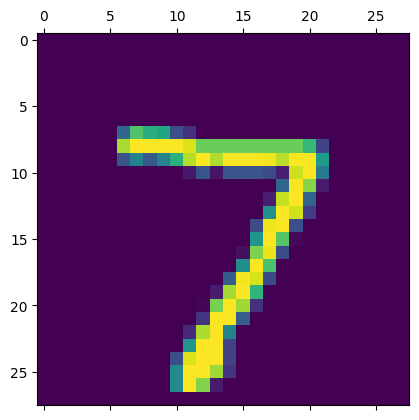

In [14]:
mplt.matshow(test_x[0])

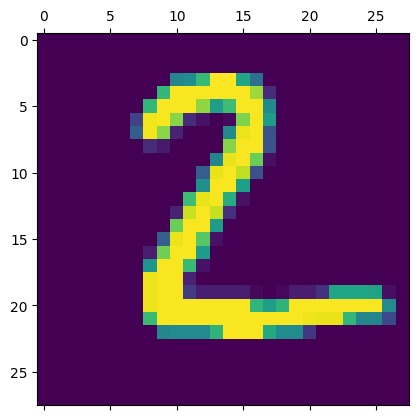

In [15]:
mplt.matshow(test_x[1])

In [16]:
predicted = NeuralNetwork.predict(test_x_1D)

313/313 [==============================] - 2s 4ms/step


In [17]:
#Prediction array for test[0]
predicted[0]

array([9.4318993e-02, 1.7028808e-05, 1.1760246e-01, 8.3270013e-01,
       6.6885757e-03, 5.9237070e-02, 3.7300324e-05, 9.9936110e-01,
       8.0571100e-02, 5.7327014e-01], dtype=float32)

In [18]:
np.argmax(predicted[0])

7

In [19]:
#Prediction array for test[1]
predicted[1]

array([2.83266246e-01, 2.06603250e-03, 9.92739201e-01, 3.75146866e-01,
       2.05783792e-07, 5.33152580e-01, 7.52882481e-01, 1.20504335e-08,
       1.74211219e-01, 1.78281664e-06], dtype=float32)

In [20]:
np.argmax(predicted[1])

2

In [22]:
num_predictions = []
for i in predicted:
    num_predictions.append(np.argmax(i))
num_predictions[:10]
    

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [23]:
num_predictions = [np.argmax(i) for i in predicted]
Graphic = tf.math.confusion_matrix(labels=test_y,predictions=num_predictions)
Graphic

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    1,    0,    2,   10,    1,    2,    0],
       [   0, 1107,    2,    2,    1,    2,    4,    2,   15,    0],
       [   7,    7,  917,   16,   11,    2,   14,   11,   41,    6],
       [   3,    0,   23,  907,    0,   30,    3,   13,   21,   10],
       [   1,    1,    3,    1,  915,    0,   13,    2,    9,   37],
       [   9,    2,    3,   31,   10,  771,   19,    5,   34,    8],
       [   8,    3,    5,    1,   10,   10,  918,    1,    2,    0],
       [   2,    8,   22,    7,    8,    0,    0,  942,    4,   35],
       [   6,    5,    7,   19,    9,   26,   11,   13,  870,    8],
       [   9,    6,    2,   12,   37,   10,    0,   22,    7,  904]])>

Text(95.72222222222221, 0.5, 'Actual Result')

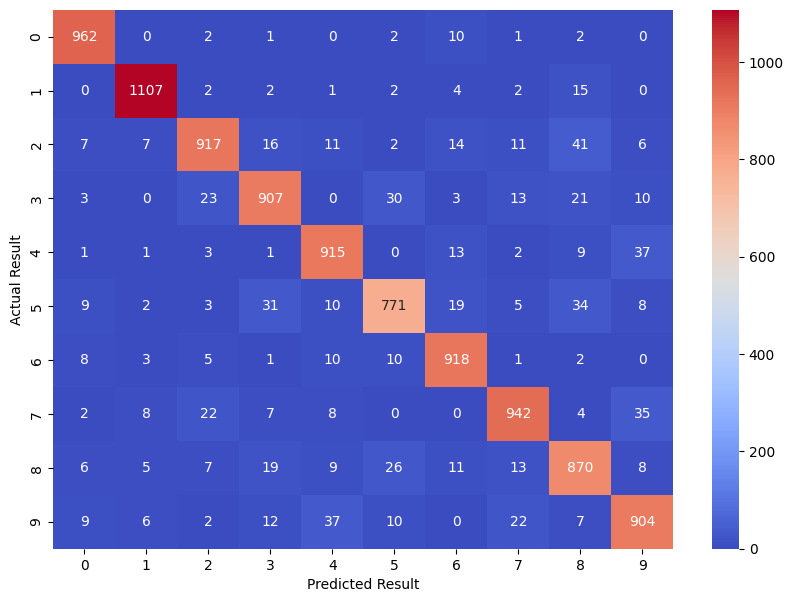

In [32]:
#Copied off this website https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
mplt.figure(figsize=(10,7))
sns.color_palette("bright", 10)
sns.heatmap(Graphic,annot=True, fmt="d", cmap="coolwarm")
mplt.xlabel('Predicted Result')
mplt.ylabel('Actual Result')